Enter number of nodes:  4


Enter neighbors and weights for node 0 (e.g., [(1, 4), (2, 1)]):


 [(1,2),(2,3)]


Enter neighbors and weights for node 1 (e.g., [(1, 4), (2, 1)]):


 [(2,3),(3,1)]


Enter neighbors and weights for node 2 (e.g., [(1, 4), (2, 1)]):


 [(3,2)]


Enter neighbors and weights for node 3 (e.g., [(1, 4), (2, 1)]):


 [(0,1)]
Enter starting node:  0


Starting Dijkstra's Algorithm from node 0...
Visiting node 0 with current distance 0.
Updating distance for node 1 to 2.
Updating distance for node 2 to 3.
Visiting node 1 with current distance 2.
Updating distance for node 3 to 3.
Visiting node 2 with current distance 3.
Visiting node 3 with current distance 3.
Dijkstra's Algorithm completed.


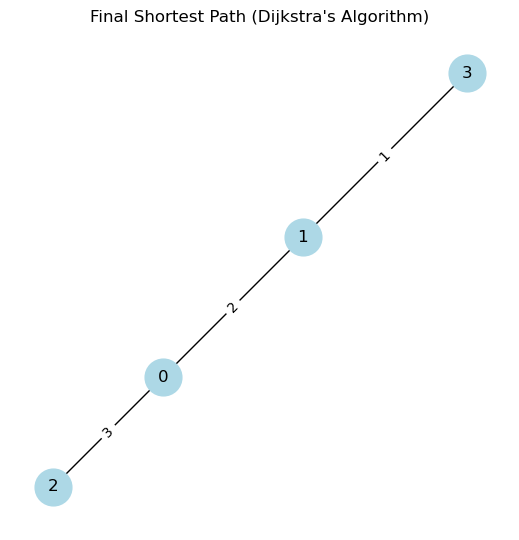

Shortest distances from node 0 : [0, 2, 3, 3]


In [3]:
import heapq
import matplotlib.pyplot as plt
import networkx as nx

def dijkstra(graph, start):
    n = len(graph)
    dist = [float('inf')] * n
    dist[start] = 0
    min_heap = [(0, start)]

    print(f"Starting Dijkstra's Algorithm from node {start}...")

    G = nx.Graph()

    while min_heap:
        d, node = heapq.heappop(min_heap)

        if d > dist[node]:
            continue

        print(f"Visiting node {node} with current distance {d}.")
        for neighbor, weight in graph[node]:
            alt = dist[node] + weight
            if alt < dist[neighbor]:
                dist[neighbor] = alt
                heapq.heappush(min_heap, (alt, neighbor))
                print(f"Updating distance for node {neighbor} to {alt}.")
                G.add_edge(node, neighbor, weight=weight)

    print("Dijkstra's Algorithm completed.")

    pos = nx.spring_layout(G)
    plt.figure(figsize=(5, 5))
    nx.draw(G, pos, with_labels=True, node_size=700, node_color="lightblue", font_size=12)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title("Final Shortest Path (Dijkstra's Algorithm)")
    plt.show()

    return dist

if __name__ == "__main__":
    graph = {}
    n = int(input("Enter number of nodes: "))
    for i in range(n):
        print(f"Enter neighbors and weights for node {i} (e.g., [(1, 4), (2, 1)]):")
        neighbors = eval(input())
        graph[i] = neighbors
    start = int(input("Enter starting node: "))
    dist = dijkstra(graph, start)
    print("Shortest distances from node", start, ":", dist)
